## **Having fun with a single qubit**

Check here the theory and mathematics behind 1 qubit single gates (https://qiskit.org/textbook/ch-states/single-qubit-gates.html)

Single qubit gates are the building blocks of your quantum circuit. When we build quantum circuits, we only need a restricted set of gates&mdash;a universal set&mdash;to build any circuit we want. In this tutorial we will see few of them, but before start let's check the general structure of a qiskit script:

In [3]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

# create quantum circuit
qc = QuantumCircuit(1)           # 1 quantum register, 1 classical register

qc.x(0)                          # add a gate to the circuit
qc.measure_all()                 # add measurement at the end

# run
sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)              # Assemble a list of circuits or pulse schedules into a Qobj
result = sim.run(qobj).result()  # run circuit, get results

# output statistics
counts = result.get_counts()     # extract statistics from results
print(counts)

{'1': 1024}


Let us walk through the code. 

In line 5 (L5) we create a quantum circuit `qc` that consists of 1 qubit, the argument of `QuantumCircuit()`. At this point, the circuit is an empty object, a container to which we can add gates. 

In L7 we add the Pauli $X$ gate `x(qubit)`, which flips the qubit state. The argument `0` is the number of the qubit to which the gate is applied.

When we are done with unitary gates, we add a measurement gate at the end of the circuit in L8. This performs a measurement in the computational basis, the basis $\{ \ket{0}, \ket{1} \}$. 

This concludes our simple circuit.

To run the circuit (L11-L13), we create a 'quantum machine' on which the circuit will be run. The library allows one to choose between different kinds of 'quantum machines'. It can be a fake 'quantum machine', that is, a simulator, which is basically a classical computer with a CPU or GPU that simulates a quantum computer. Or it can be a real quantum device that is implemented in a particular physical hardware. At this point, we have chosen the `aer_simulator` which is simulator that can be mimic many different kinds of quantum evolutions.

Finally, in L16 we extract measurement statistics from results.

What does the printout `{'1': 1024}` show? It shows that as a result of the measurement, we have gotten the state $\ket{1}$ 1024 times. By default, our simulator ran the circuit 1024 times, and each time we got the same state.

We can depict this in a histogram. The histogram shows probabilities instead of raw counts.

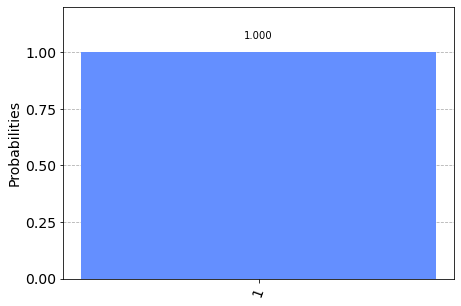

In [4]:
plot_histogram(counts)

We can also draw the quantum circuit. The argument `"mpl"` gives a nice matplotlib output.

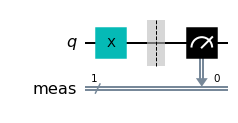

In [5]:
qc.draw("mpl")

Last, but not least, we can visualize the quantum state using a 3D representation called Bloch sphere. Check the code below:

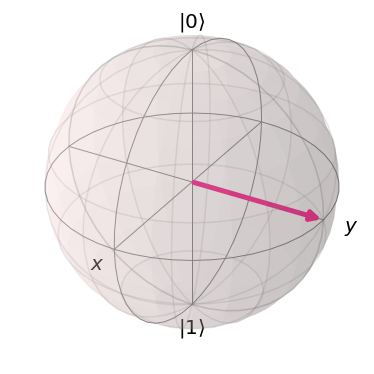

In [6]:
from qiskit.visualization import plot_bloch_vector

vector = [0, 1, 0]         # coordinates [x, y, z]
plot_bloch_vector(vector)  # plot in the Bloch sphere

Now, let's play with quantum gates!

#### **Pauli gates**

In a non-mathematical way, Pauli gates are those that turns 180º each axis according to their name. Here it is how you can use them in a quantum circuit and their representation:

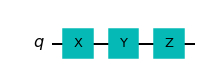

In [7]:
qc = QuantumCircuit(1)
qc.x(0)
qc.y(0)
qc.z(0)
qc.draw("mpl")

The implementation of those gates in a circuit looks like this:

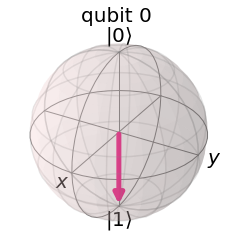

In [8]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# create quantum circuit
qc = QuantumCircuit(1)

qc.x(0)                                # add gate x(qubit)

# run
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()                  # we want to use statevector later
qobj = assemble(qc)
result = sim.run(qobj).result()         # run circuit, get results
final_state = result.get_statevector()  # get the final state from the result

# visualize
plot_bloch_multivector(final_state)     # display final state directly on Bloch sphere

By default, quantum registers starts pointing to the qubit 0. It can be changed at any time setting the initial state.

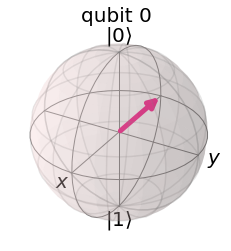

In [11]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# create quantum circuit
qc = QuantumCircuit(1)
init_state = [1. / np.sqrt(2), 1. / np.sqrt(2)]  # define initial state
qc.initialize(init_state, 0)                     # initialize qubit 0 to init_state
qc.z(0)                                          # add gate z(qubit)

# run
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()                   # we want to use statevector later
qobj = assemble(qc)
result = sim.run(qobj).result()         # run circuit, get results
final_state = result.get_statevector()  # get the final state from the result

# visualize
plot_bloch_multivector(final_state)     # display final state directly on Bloch sphere

**Excercise:** play with Pauli gates, changing qc.z() by qc.x() or qc.y(). Change also the state vector.